**STOCHASTIC GRADIENT DESCENDENT**

In [1]:
import pandas as pd
red_wine = pd.read_csv('../../../data/red-wine.csv')

df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
range = max_ - min_
df_train = (df_train - min_) / range
df_valid = (df_valid - min_) / range

X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [2]:
X_train.shape

(1119, 11)

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
  layers.Dense(512, activation='relu', input_shape=[11]),
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(1),
])

/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
  optimizer='adam',
  loss='mae'
)

In [5]:
history = model.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  batch_size=256,
  epochs=20
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3324 - val_loss: 0.1330
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1331 - val_loss: 0.1207
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1242 - val_loss: 0.1143
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1175 - val_loss: 0.1094
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1151 - val_loss: 0.1090
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1065 - val_loss: 0.1023
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1032 - val_loss: 0.1016
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1050 - val_loss: 0.1052
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1002 - val_loss: 0.1001
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1044 - val_loss: 0.1031
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0998 - val_loss: 0.1077
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1013 - val_loss: 0.0996
E

<Axes: >

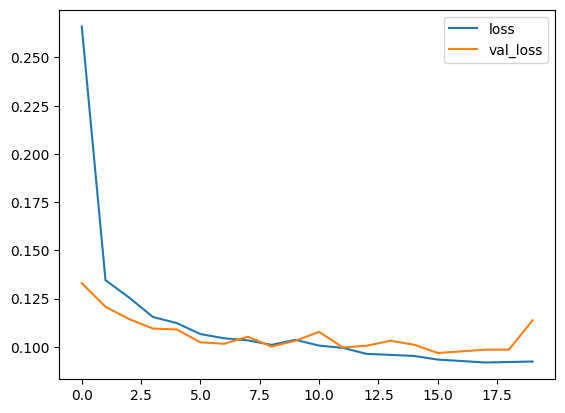

In [6]:
history_df = pd.DataFrame(history.history)
history_df.plot()

/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Axes: >

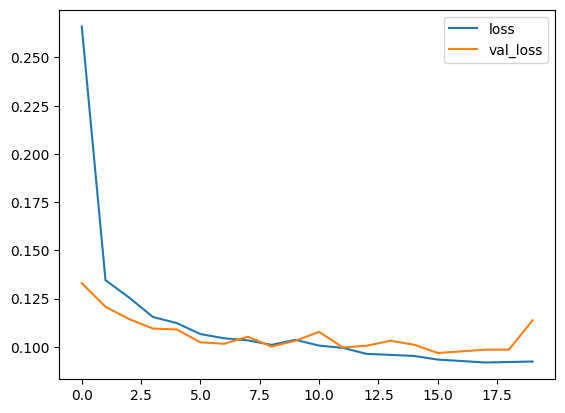

In [7]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
  min_delta=0.001,
  patience=20,
  restore_best_weights=True,
)
model2 = keras.Sequential([
  layers.Dense(512, activation='relu', input_shape=[11]),
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(1),
])
model2.compile(
  optimizer='adam',
  loss='mae'
)
history2 = model2.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  batch_size=256,
  callbacks=[early_stopping],
  verbose=0
)
history2_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot()